In [1]:
import numpy as np
import PIL.Image

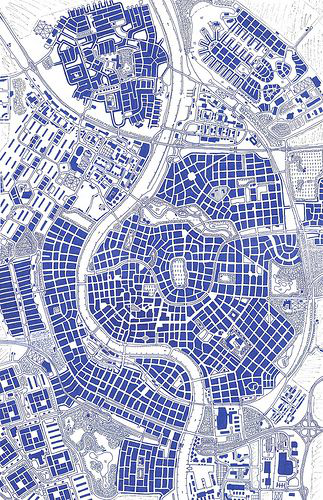

In [2]:
original = PIL.Image.open('./original.jpg')
original

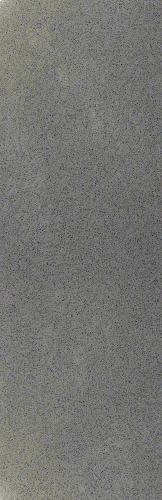

In [3]:
fft = np.fft.rfft2(np.array(original), axes=(0, 1))

fft_vis = np.abs(fft)
fft_vis = np.log(fft_vis)
fft_vis = fft_vis - fft_vis.min()
fft_vis = fft_vis / fft_vis.max()
fft_vis = fft_vis * 255
PIL.Image.fromarray((fft_vis).astype(np.uint8))

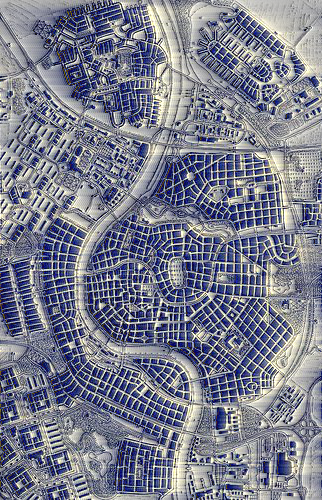

In [4]:
angle = np.pi * .25
decohered = fft * (np.cos(angle) + np.sin(angle) * 1j)

modified = np.fft.irfft2(decohered, axes=(0, 1))
modified = np.abs(modified)
modified = np.clip(modified, 0, 255)
reconstructed = PIL.Image.fromarray(modified.astype(np.uint8))
reconstructed.save('./reconstructed.png')
reconstructed